# Exploration and Predictions of Diabetes from Medical Records
## by: Alicia Bierly
## Abstract:
This first part of this project explores statistical significance of various factors in predicting whether a women over the age of 21 has a diabetes diagnosis. Initial analysis determined that the number of pregnancies was statistically significant in differentiating individuals with and without diabetes, though insufficient as a standalone predictor. Additional factors, including glucose levels, BMI, age, and blood pressure, were also statistically significant based on p-values and u-stats. However, further analysis is needed to distinguish between different types of diabetes, as their distinct physiological mechanisms influence variable significance. 

The second part of this project investigates a dataset containing medical records of individuals diagnosed with various types of diabetes, but focused on differentiating type I vs type II diabetes. A random forest classification approach revealed fluctuating feature importance, with BMI, cholesterol, and age frequently ranking highest. BMI's relevance aligns with its role in insulin resistance and type 2 diabetes development, while age differentiates between type 1 and type 2 onset. Elevated cholesterol, particularly LDL, was also identified as a contributing factor, as visceral fat can impair insulin sensitivity. Interestingly, training and testing errors remained equal across different feature sets, warranting further investigation.

### Main components of the project: 
1) Data cleaning
2) Data Exploration (of variables)
3) Statistical Analysis (using t-tests, u-stats, p-values)
4) Prediction of Type 1 and Type 2 Diabetes from medial records (using random forest classification)

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

### Datasets:
I am using two different data sets. Both contain data on diabetes patients, but were evaluated differently. One data set has data on individuals with and without diabetes from National Institute of Diabetes and Digestive and Kidney Diseases (all patients here are females at least 21 years old of Pima Indian heritage). The other data set has patient data on different types of diabetes
https://www.kaggle.com/datasets/ankitbatra1210/diabetes-dataset
https://www.kaggle.com/datasets/arezalo/diabetes

### Data Cleaning: 
These data sets didn't need much data cleaning as each row contained valid values. In addition, all of the integers were already converted to integers. I did create a type12 dataframe that contains type 1 and type 2 diabetes data as I used this in other sections.

In [29]:
# open dataframe
diabetes = pd.read_csv("diabetes_dataset00.csv")
type12 = diabetes[diabetes["Target"].isin(["Type 1 Diabetes", "Type 2 Diabetes"])]
numb_cols = list(diabetes.loc[0, type12.dtypes == 'int64'].index)
np.random.seed(25)
# this is a very rare disease and didn't have many columns so I removed it
diabetes = diabetes[diabetes["Target"] != "Wolcott-Rallison Syndrome"].head(5)
diabetes

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


### Investigate Data Values:
#### Different Types of Diabetes In Dataset

In [30]:
diabetes["Target"].value_counts()

Target
Steroid-Induced Diabetes            1
Neonatal Diabetes Mellitus (NDM)    1
Prediabetic                         1
Type 1 Diabetes                     1
Wolfram Syndrome                    1
Name: count, dtype: int64

I researched the different types of diabetes in the dataset: 
- MODY (Maturity-onset diabetes of the young): typically begins before the age of 30, genetic mutation
- Secondary Diabetes: caused by another primary disease condition, caused by endocrine dysfunctions, pancreatic disorders, hemochromatosis, polycystic ovarian syndrome (PCOS), or induced by drugs
- Cystic Fibrosis-Related Diabetes: has features of both type 1 (pancreas does not make enough insulin) and 2 (develop insulin resistance)
- Type 1 Diabetes: prevents pancreas from making insulin; reaction destroys beta cells in pancreas that make insulin
- Type 2 Diabetes: cells in muscle, fat and the liver become resistant to insulin and as a result, the cells don't take in enough sugar 
- Neonatal Diabetes Mellitus (NDM): develop in the first 6 to 12 months of life, do not produce enough insulin
- Prediabetic: higher than normal blood sugar, but is not high enough to be considered type 2
- Gestational Diabetes: diabetes first diagnosed during pregnancy
- Type 3c Diabetes: diabetes resulting from pancreatic disease
- Wolfram Syndrome: inherited condition that typically includes childhood-onset insulin-dependent diabetes mellitus and progressive optic atrophy
- Steroid-Induced Diabetes: liver less sensitive to insulin so it carries on releasing glucose even if the pancreas is releasing insulin
- LADA: Latent autoimmune diabetes, pancreas stops making insulin from autoimmune process is damaging cells in the pancreas

#### Investigating Columns
Here is where I found that there are no null values in the first dataset. 

In [31]:
#print(f"{'Column':<35}{'Type':<30}{'Total Nulls':<30}")
for i in diabetes.columns:
    typec = str(diabetes[i].dtype)
    if typec == "object":
        typec = "str"
    nullc = diabetes[i].isnull().sum()
    #print(f"{i:<35}{typec:<30}{nullc:<30}")

In [32]:
diabetes.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,21.000000,19.600000,22.400000,104.200000,160.800000,34.400000,172.200000,11.000000,35.400000,69.200000,1.600000,44.600000,2688.80000
std,12.708265,19.112823,9.289779,20.413231,32.018745,9.813256,72.164396,6.244998,18.324847,18.939377,0.894427,17.140595,880.21628
min,8.000000,1.000000,16.000000,73.000000,121.000000,24.000000,105.000000,2.000000,10.000000,41.000000,1.000000,24.000000,1770.00000
25%,13.000000,7.000000,17.000000,100.000000,146.000000,29.000000,121.000000,8.000000,26.000000,60.000000,1.000000,28.000000,1881.00000
50%,17.000000,10.000000,17.000000,103.000000,151.000000,33.000000,168.000000,12.000000,36.000000,76.000000,1.000000,55.000000,2629.00000
75%,27.000000,36.000000,24.000000,121.000000,185.000000,36.000000,178.000000,15.000000,49.000000,80.000000,2.000000,56.000000,3542.00000
max,40.000000,44.000000,38.000000,124.000000,201.000000,50.000000,289.000000,18.000000,56.000000,89.000000,3.000000,60.000000,3622.00000


#### Investigating columns with Numerical Values
Some of the distributions are roughly normal, while others are slightly skewed to the left and right. 

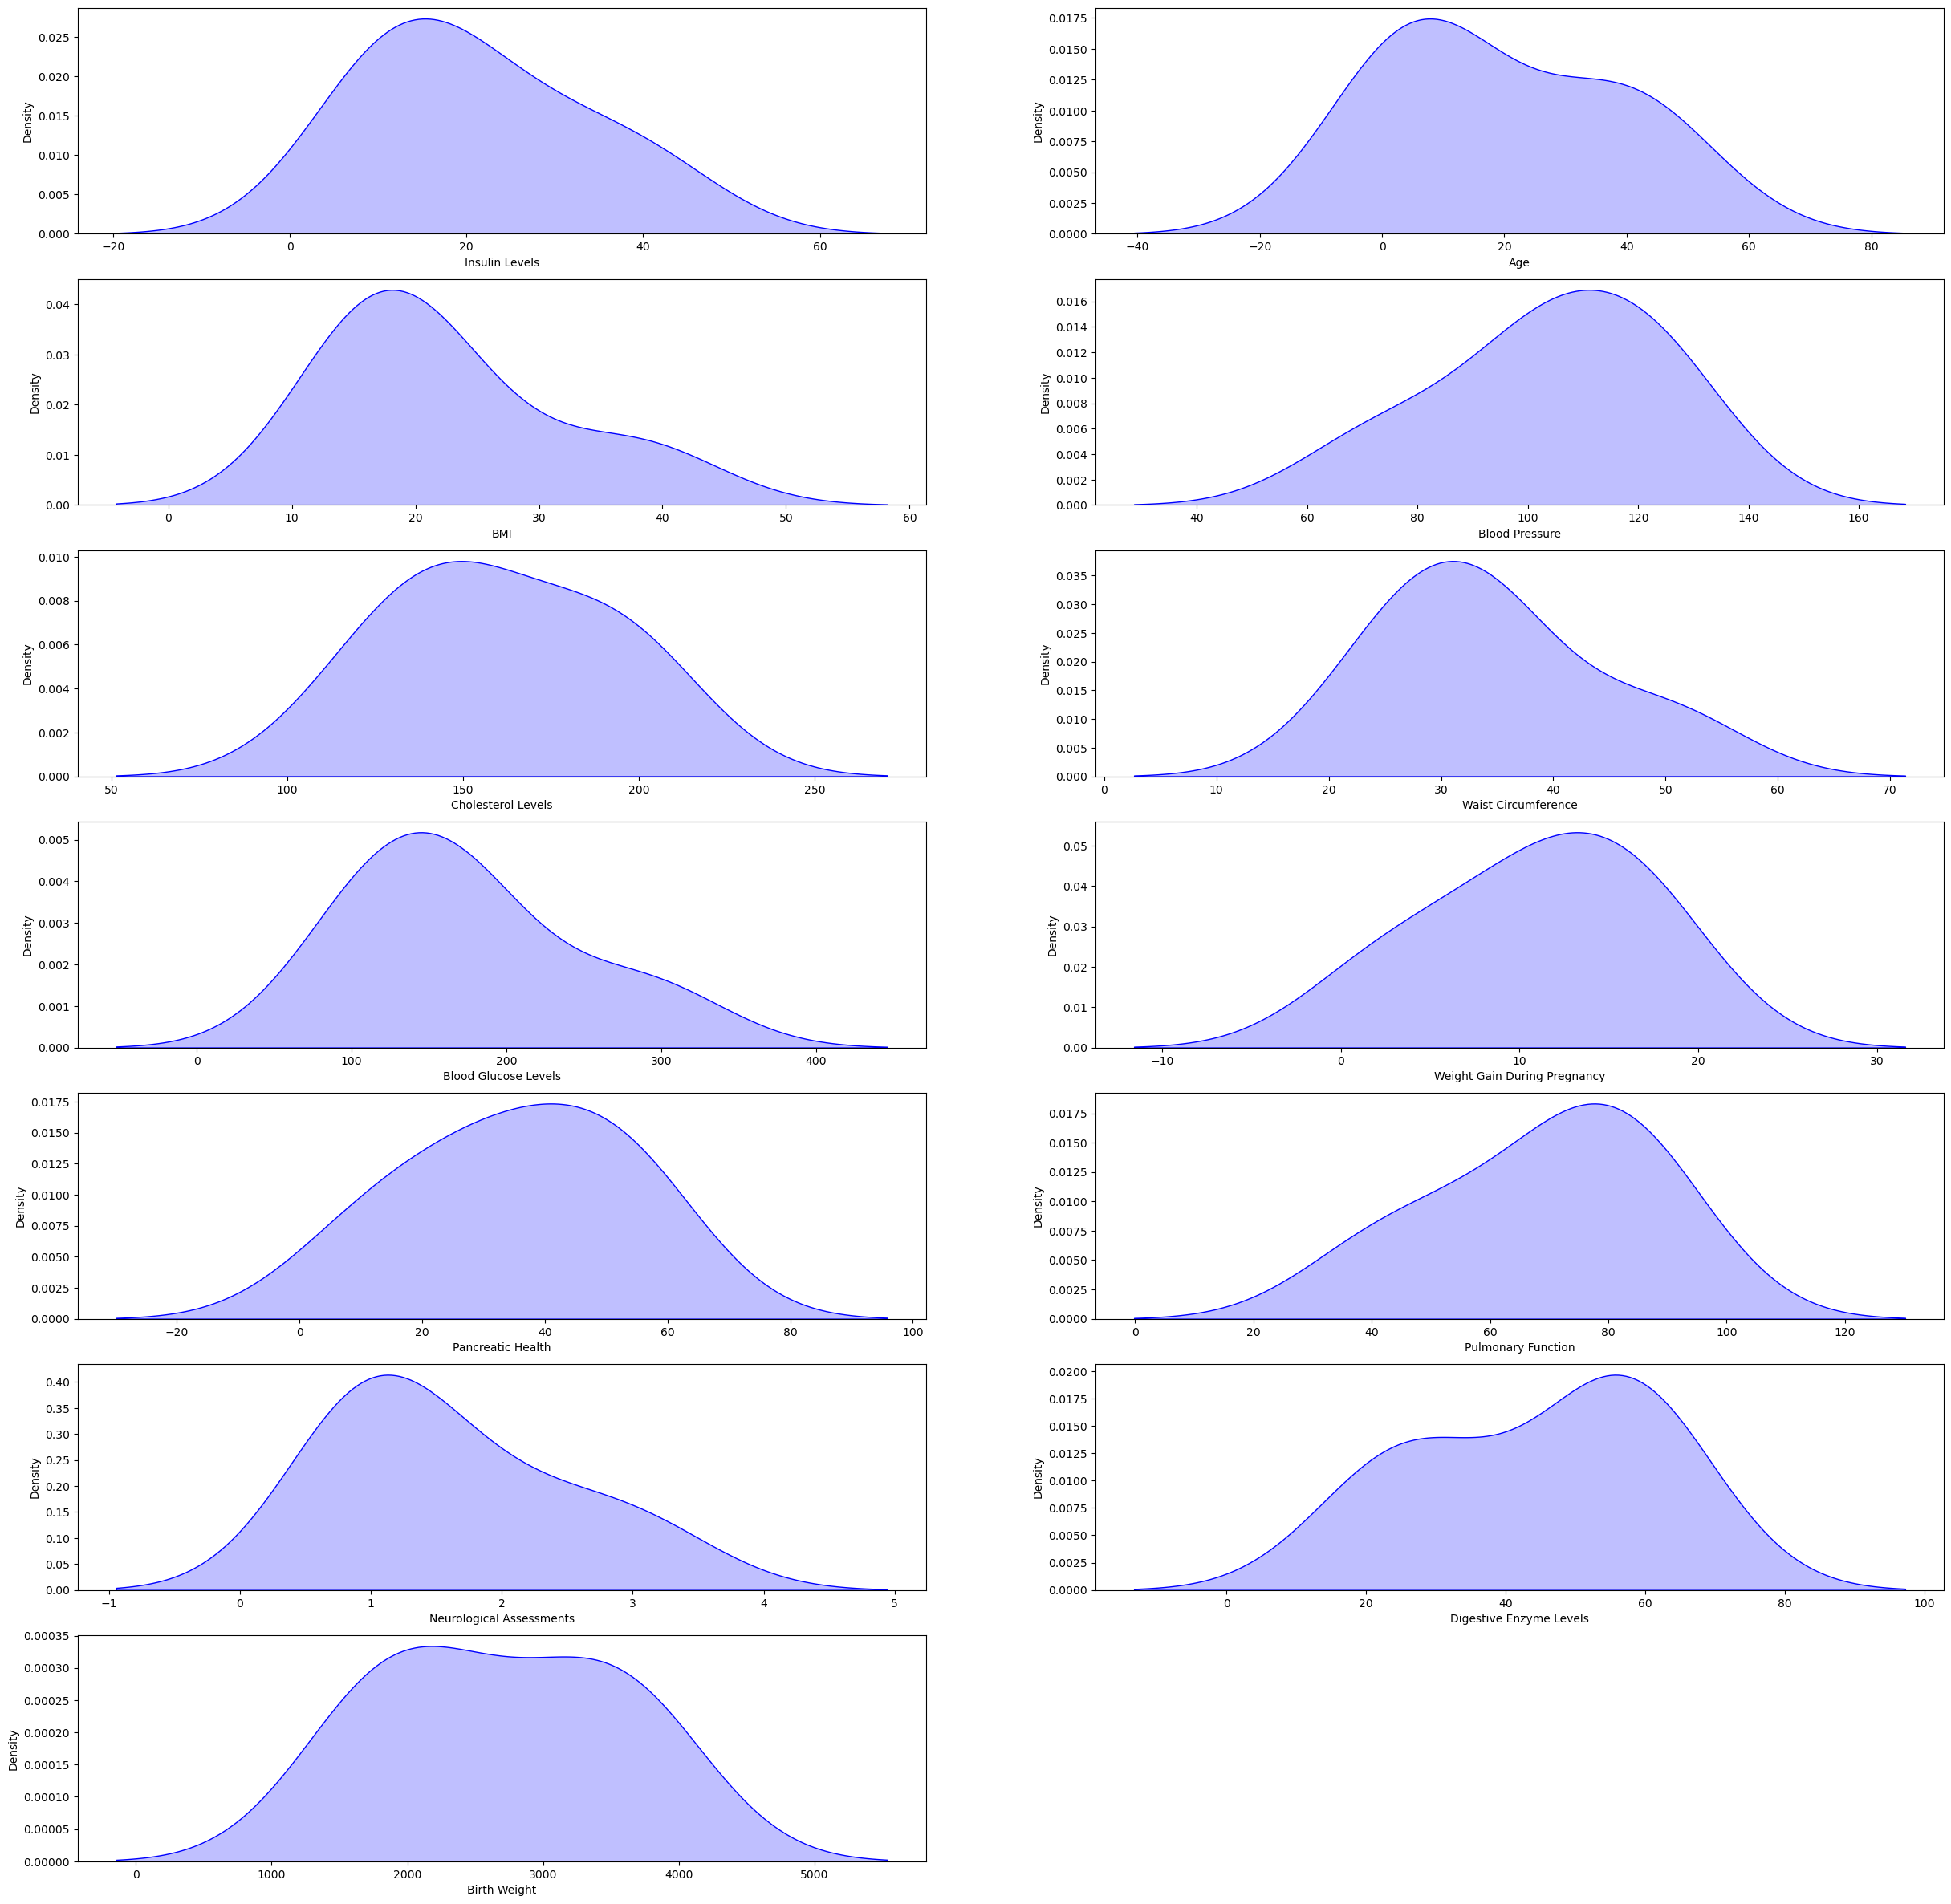

In [33]:
fig = plt.figure(figsize=(30,30))

counter = 0
for col in diabetes.select_dtypes(include=['number']).columns:
    sub = fig.add_subplot(7,2,counter+1)
    g = sns.kdeplot(x=col,data=diabetes.select_dtypes(include=['number']), fill=True,color="Blue")
    plt.xticks()
    if counter < 12:
        counter+=1

#### Investigate Columns with String Values: 
I think some of these columns were messed up when the dataset was created. For example, the "Ethnicity" column has values of "high risk" or "low risk". The dataset didn't provide information as to where this data came from, so I am hesitant to use these values in the future. Because of this, I focused on the numerical values in future sections. 

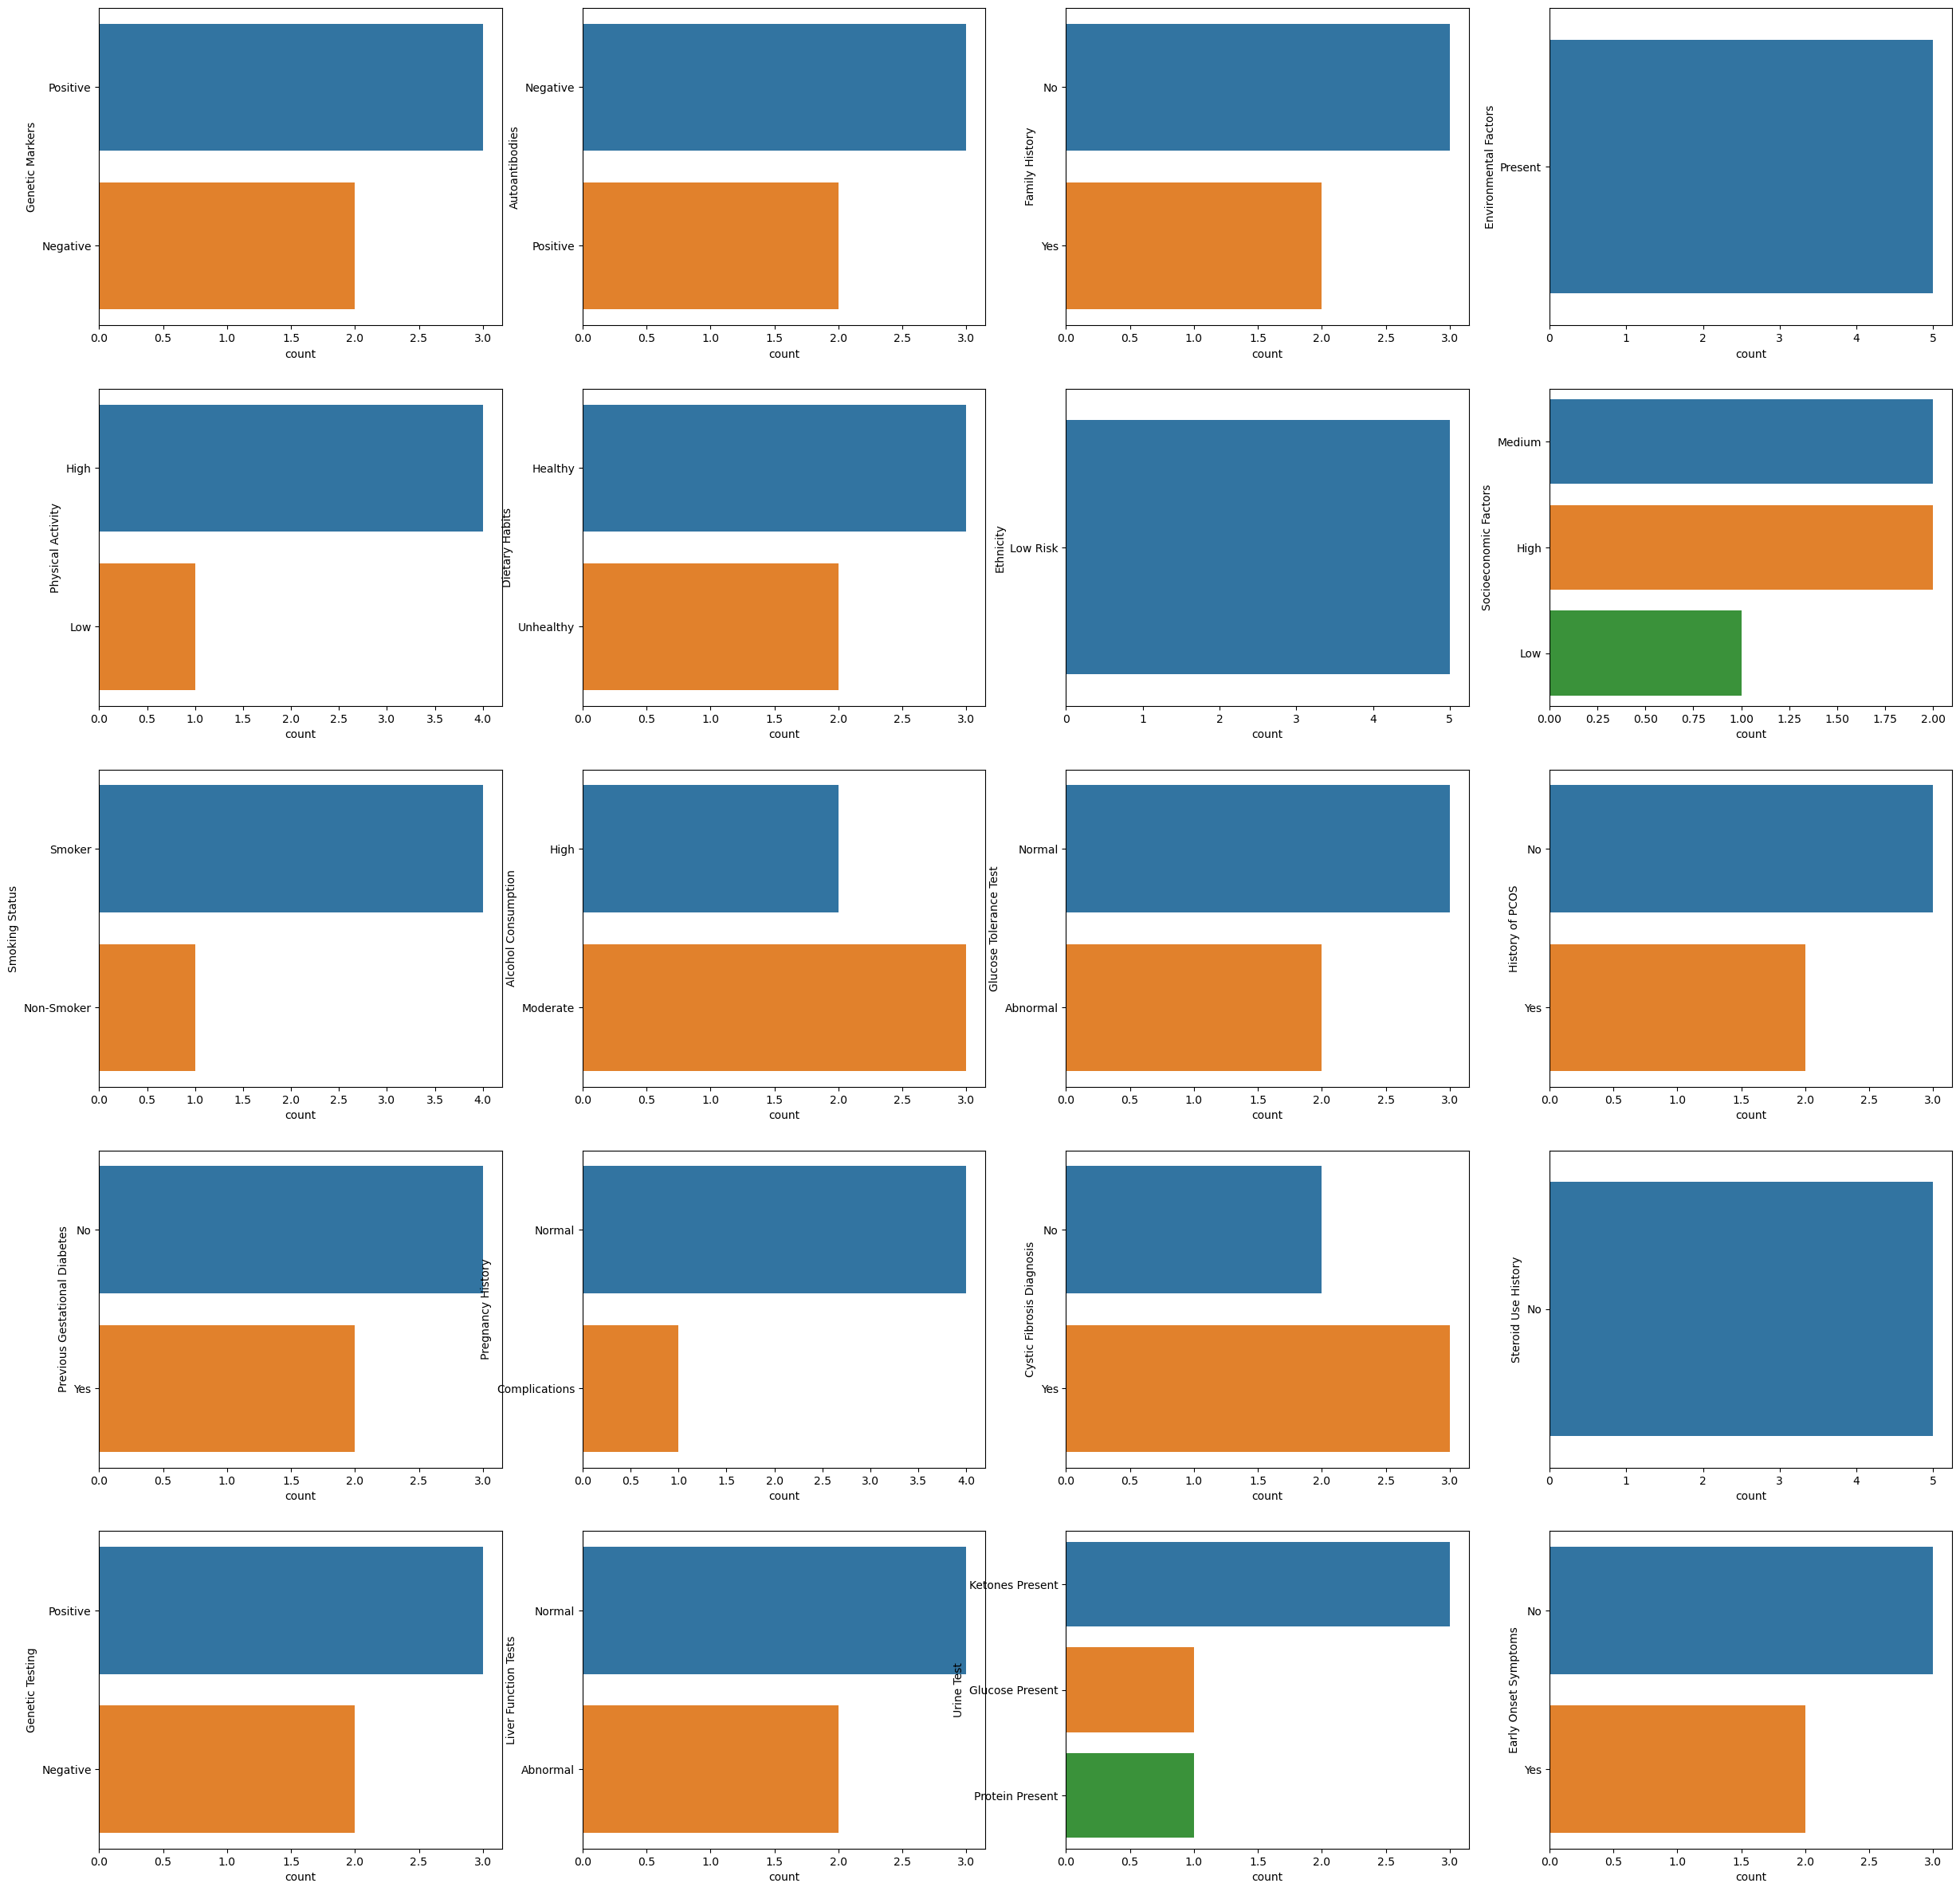

In [34]:
fig = plt.figure(figsize=(30,30))
counter = 0
for col in diabetes.select_dtypes(include=['object']).columns[1:]:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.countplot(y=col, data=diabetes.select_dtypes(include=['object']))
    #plt.xticks(rotation=45)
    counter += 1

### Exploring Correlation Between Variables
We can see there are higher correlations between variables including age, BMI, blood pressure, cholesterol levels, waist circumfrence, and weight gain during pregnancy. 

Text(0.5, 1.0, 'Heatmap of Correlations between Numerical Variables of Types of Diabetes')

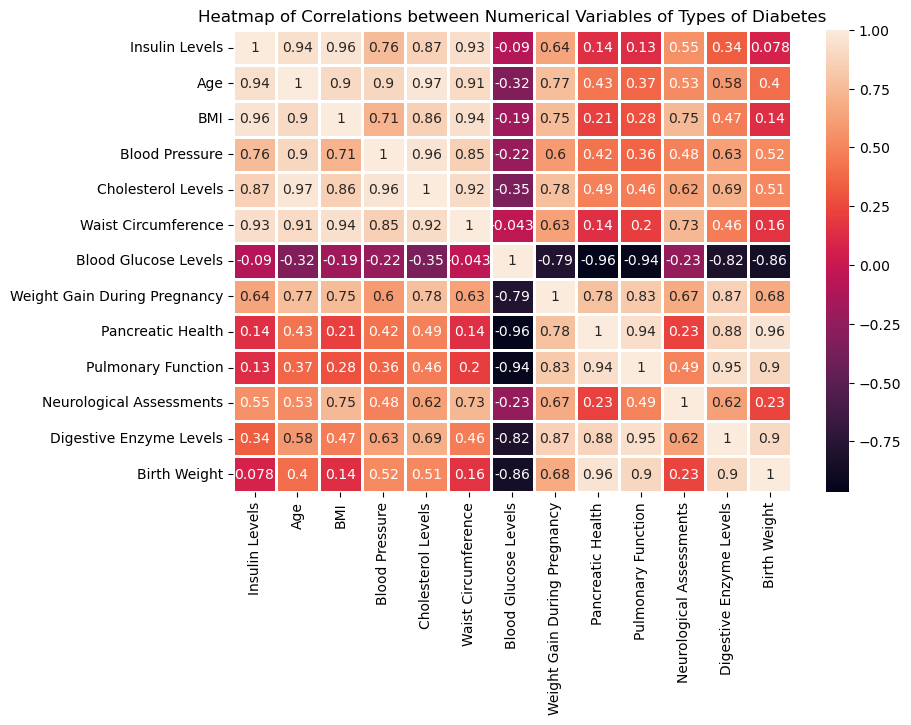

In [35]:
# heatmap
plt.figure(figsize = (9,6))
sns.heatmap(diabetes.select_dtypes(include=['number']).corr(),linewidths= 1, annot = True)
plt.title("Heatmap of Correlations between Numerical Variables of Types of Diabetes")

### Looking at Distributions of Numerical Variables for Type 1 and Type 2 Diabetes: 
From these plots, we can see somewhat distict distributions of values between type 1 and type 2 diabetes. This will be interesting to explore in the future. 

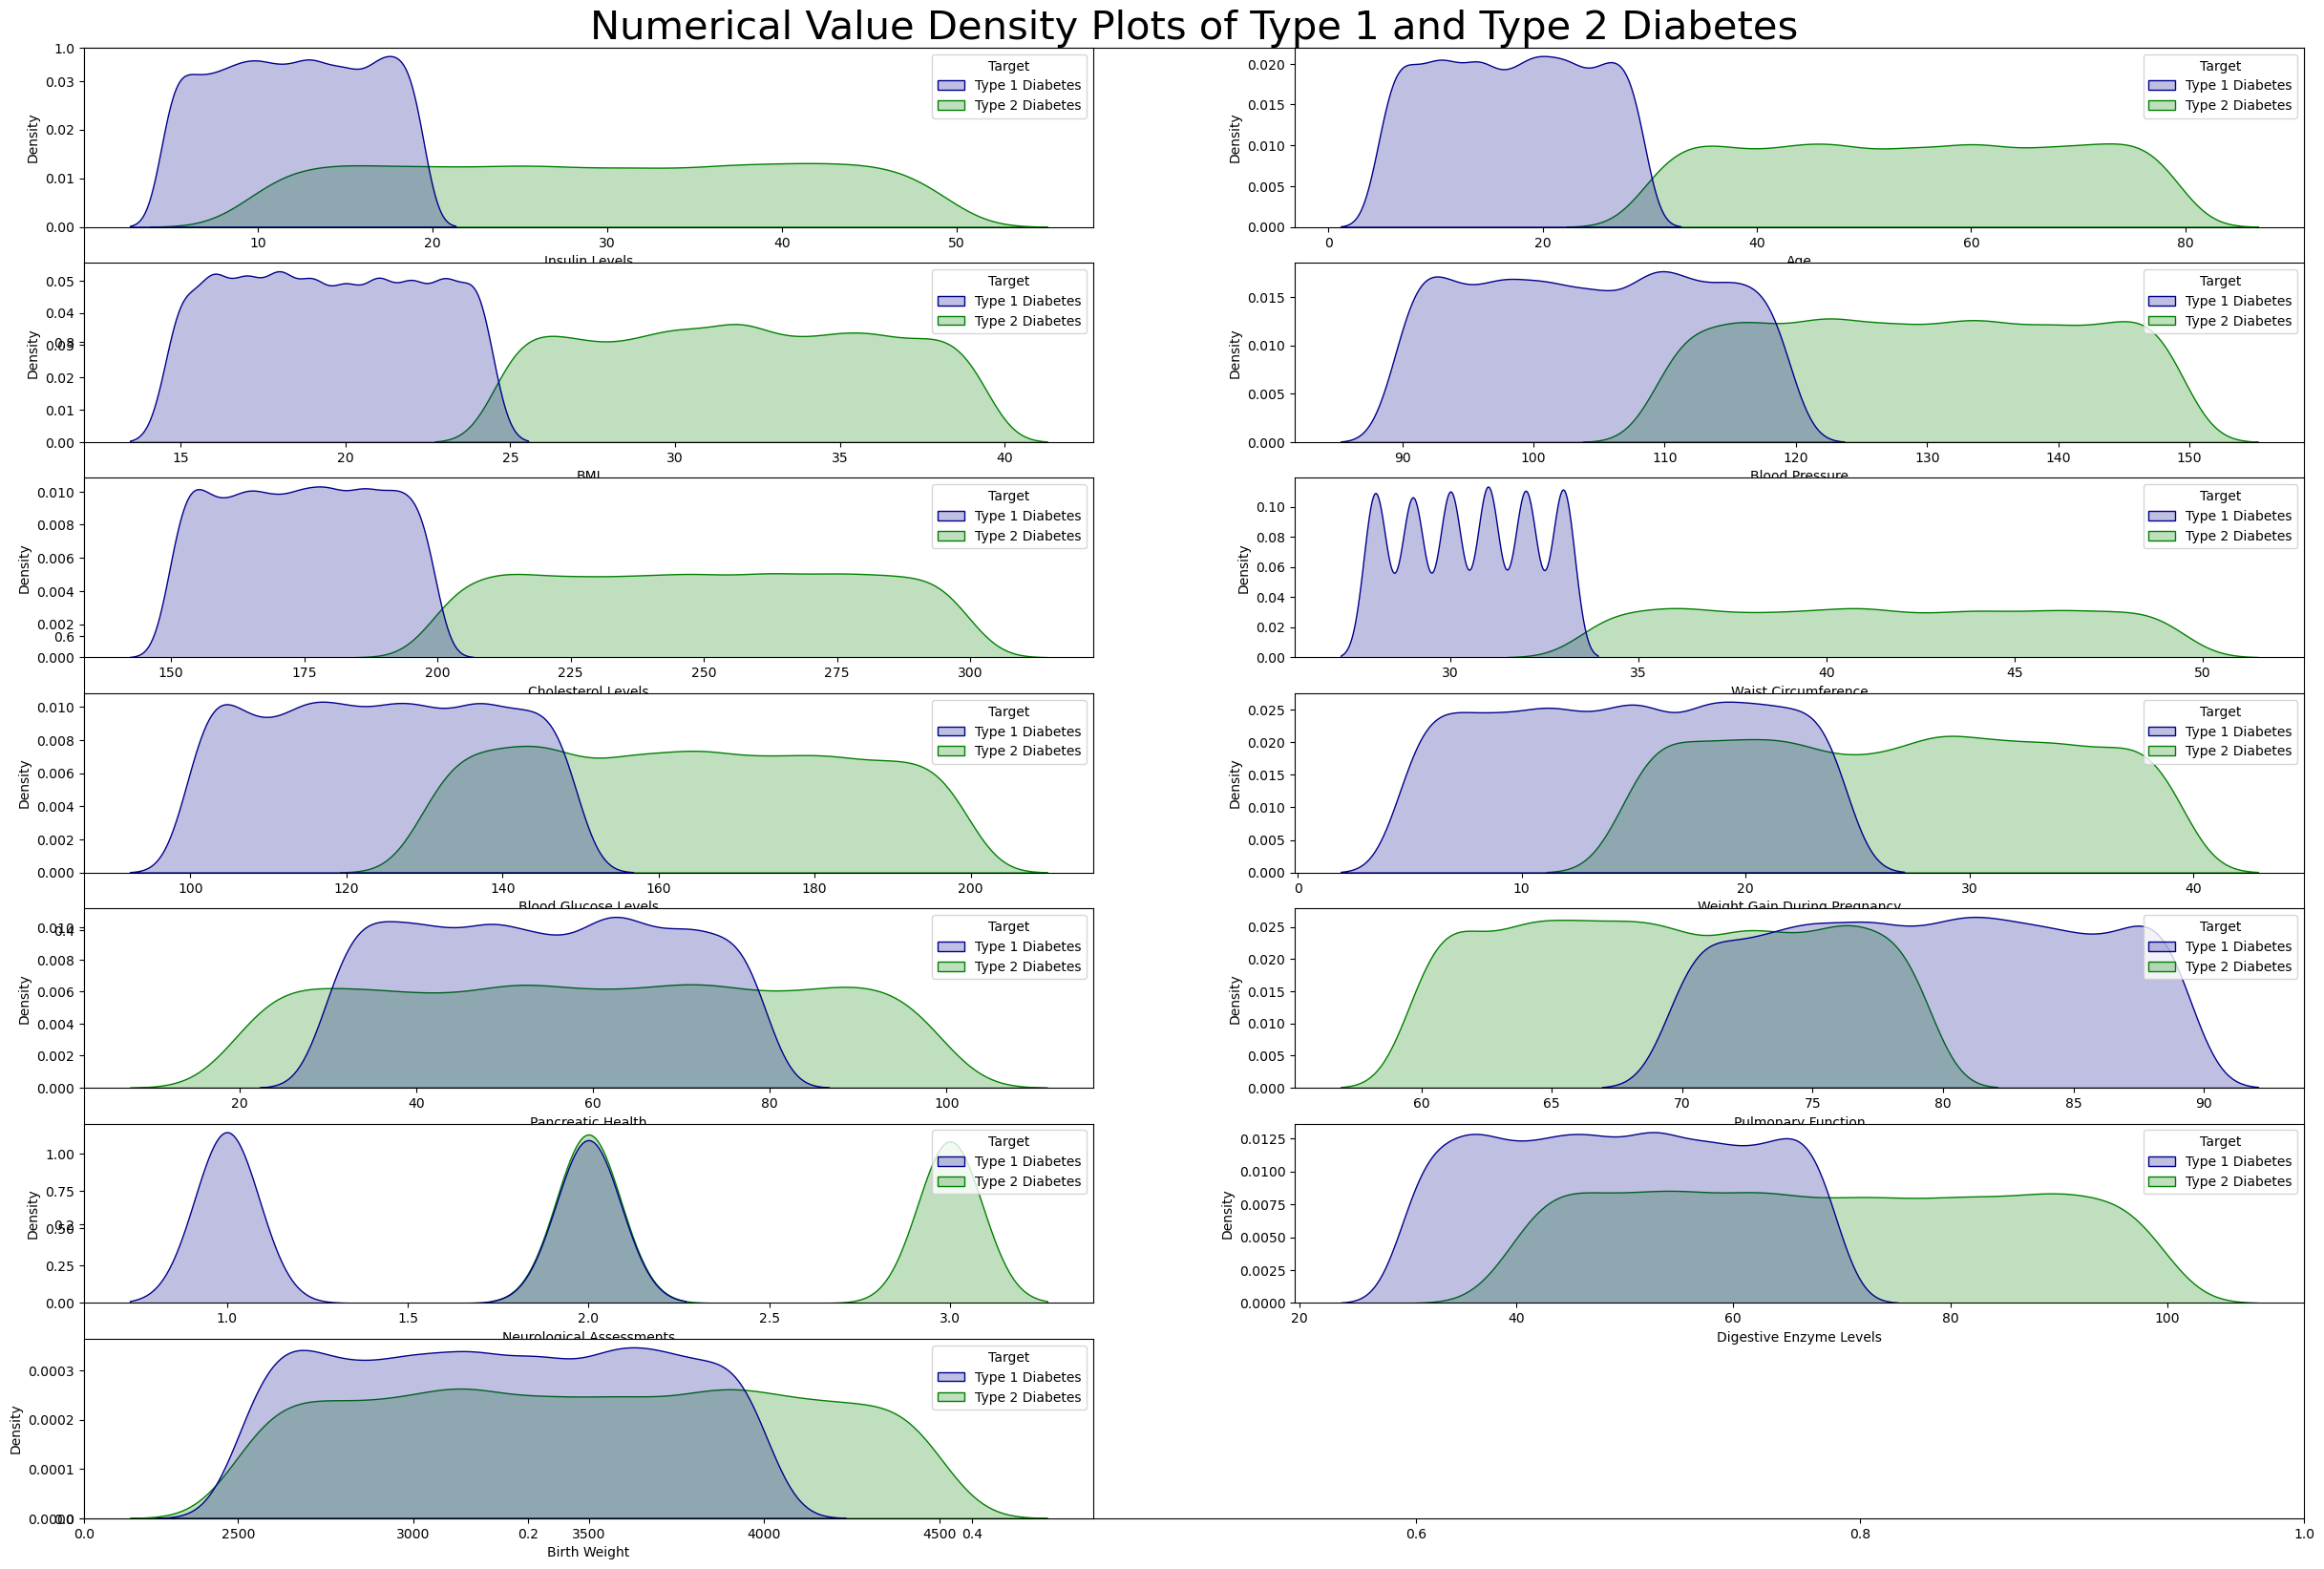

In [36]:
# create dataframe for plotting
numb = type12.copy()
numb = type12.reset_index(drop=True)
numb = type12[numb_cols]
numb["Target"] = type12["Target"]

# create plot
fig = plt.figure(figsize=(30,20))
plt.title("Numerical Value Density Plots of Type 1 and Type 2 Diabetes", fontsize=30)
counter = 0
for i in numb.drop(columns="Target").columns:
    sub = fig.add_subplot(7,2,counter+1)
    sns.kdeplot(data=numb, x=i, hue="Target", fill=True, palette=["darkblue", "green"])
    counter+=1

### Conclusion: 
The first dataset I will be using contains data on female patients with different types of diabetes with various variables. Some of the categorical columns include genetic markers, autoibodies, and family history of diabetes. Some of the numerical columns include digestive enzyme levels, cholesterol levels, and blood pressure. The second dataset contains data on female patients with and without diabetes in the Native American Tribe called Pima (located in Arizona). I do investigative data in the inference section on this dataset below. I found that the data was cleaned well with no abnormal values and no Null values in each of the rows. I will be exploring the factors that influence diabetes in future sections. 

## Evaluating correlations between variables:
I created a pairplot to see the distributions of data to evaluate correlations between those with and without diabetes. I found that this data set has vast data on people with and without diabetes. 

<Figure size 2000x2000 with 0 Axes>

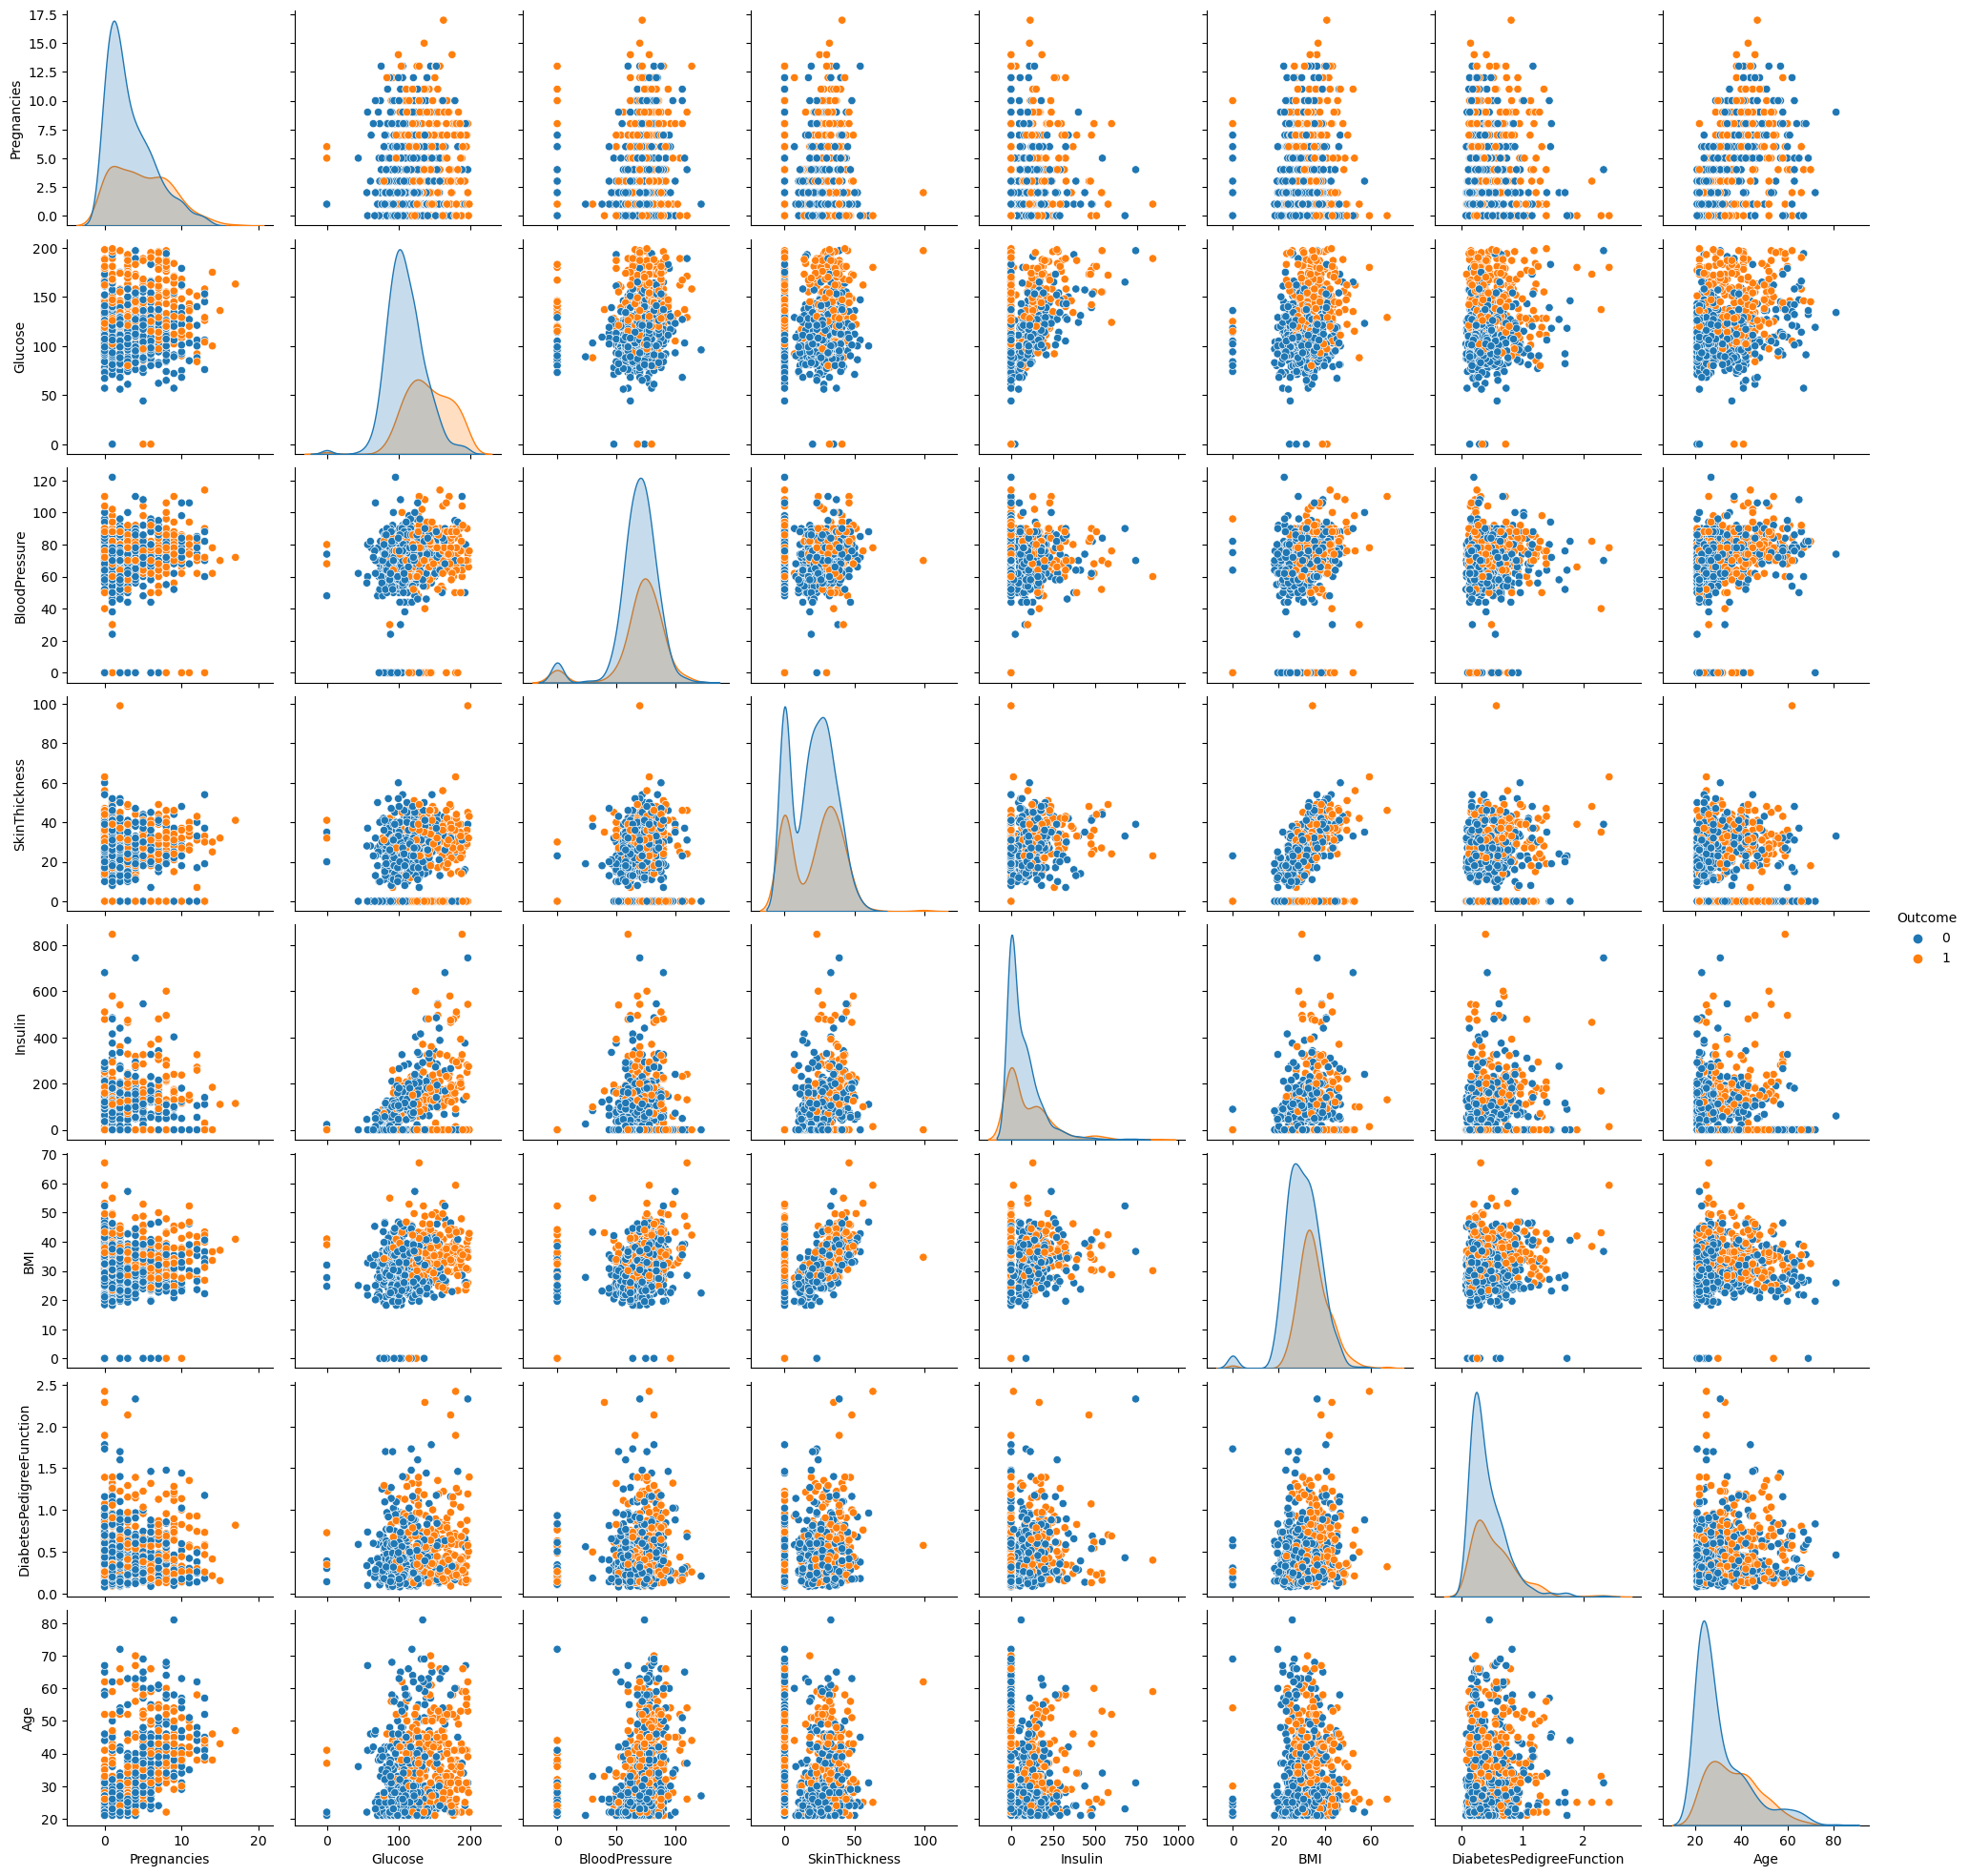

In [37]:
diabetes2 = pd.read_csv("diabetes2.csv")
fig = plt.figure(figsize=(20,20))
sns.pairplot(data=diabetes2, hue="Outcome")

In [38]:
# Evaluating correlations between a variable and the outcome which is (0 = no diabetes and 1 = diabetes)
diabetes2.corr().loc["Outcome"].reset_index().sort_values(by="Outcome", ascending=False)

,index,Outcome
8,Outcome,1.000000
1,Glucose,0.466581
5,BMI,0.292695
7,Age,0.238356
0,Pregnancies,0.221898
6,DiabetesPedigreeFunction,0.173844
4,Insulin,0.130548
3,SkinThickness,0.074752
2,BloodPressure,0.065068


### Hypothesis:
After seeing the correlations between outcome and the other variables, I wanted to explore if there was significance between pregancies and whether individuals were diagnosed with diabetes. I wanted to look at this specifically because it had a lower correlation to whether people were or were not diagnosed, but could still have a significant impact. In addition, all of this data includes women, so it will be interesting to look at how this subpopulation is affected. 

- Null Hypothesis: There is no significant difference in the pregancies between people with diabetes and people without diabetes.

- Alternative Hypothesis: There is significant difference in the pregancies between people with diabetes and people without diabetes.

### Analysis: 
To test this hypothesis... 
- I compared mean values of people with and without diabetes
- Plotted the histograms and barplots of pregnancies for those with and without diabetes with there respective mean values
- Conducted a t-test and u-test (as the data was somewhat not normal).


 Patients without Diabetes Mean: 3.298 
 Patients with Diabetes Mean: 4.865671641791045


Text(0.5, 1.0, 'Barplot:')

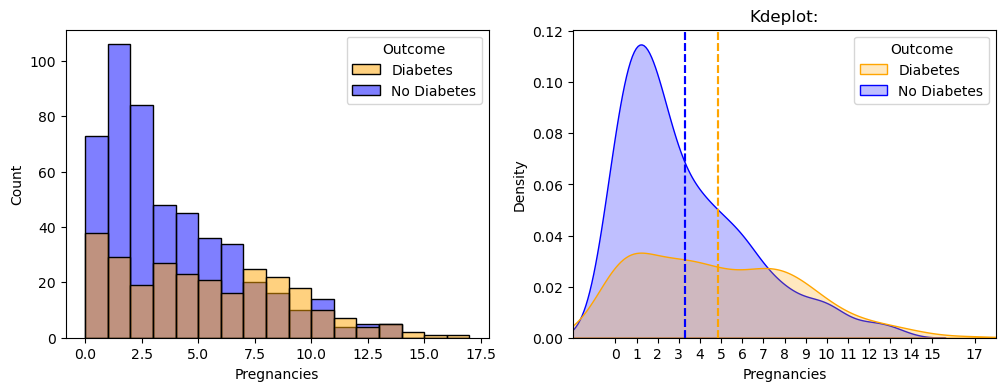

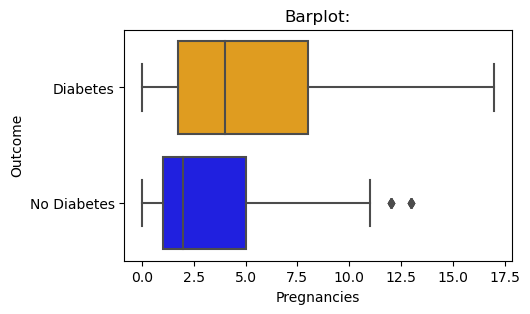

In [39]:
s = "Pregnancies"
diabetes22 = diabetes2.copy()
diabetes22 = diabetes22.replace({"Outcome": {0: "No Diabetes", 1: "Diabetes"}})

# calculate means of groups
glucose_mean0 = np.mean(diabetes2[diabetes2["Outcome"]==0][s])
glucose_mean1 = np.mean(diabetes2[diabetes2["Outcome"]==1][s])

# create visual of histogram per group with mean values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(diabetes22[[s, "Outcome"]], x=s, hue="Outcome", fill=True, palette={"No Diabetes": 'blue', "Diabetes": 'orange'}, binwidth=1, ax=axes[0])
plt.axvline(glucose_mean0, color='blue', linestyle='--')
plt.axvline(glucose_mean1, color='orange', linestyle='--')
plt.xticks(diabetes22.sort_values("Pregnancies")["Pregnancies"].unique())
plt.title("Histogram Distribution:")

# create visual of density curves per group with mean values
sns.kdeplot(diabetes22[[s, "Outcome"]], x=s, hue="Outcome", fill=True, palette={"No Diabetes": 'blue', "Diabetes": 'orange'}, ax=axes[1])
plt.axvline(glucose_mean0, color='blue', linestyle='--')
plt.axvline(glucose_mean1, color='orange', linestyle='--')
plt.xlim(-2,18)
plt.title("Kdeplot:")

# create barplots of distribution of those with and without diabetes
print(f"\n Patients without Diabetes Mean: {glucose_mean0} \n Patients with Diabetes Mean: {glucose_mean1}")
fig = plt.figure(figsize=(5,3))
sns.boxplot(diabetes22[[s, "Outcome"]], x=s, y="Outcome", palette={"No Diabetes": 'blue', "Diabetes": 'orange'},orient="h")
plt.title("Barplot:")

Means: The mean value for patients without diabetes was 3.298 pregnancies as patients with diabetes had an average of 4.86 pregnancies. When rounded, this has a difference of around 2, which may result in significance in the data from a t-test or u-test. 

Distributions: We can see that both groups have a right trailing tail. People without diabetes have a high peak between 0-3 pregnancies and then tapers off the the right. People with diabetes has no major peaks and contains relatively even values between 0-10 pregancies, but has significantly less values than those without diabetes. Even when plotting the densities in order to normalize the data (as there are more no diabetes rows), there is still this distribution. 

Looking at these distributions, a p-value found through a Mann-Whitney U test is more appropriate, but I will calculate both just to look over both values. 

In [40]:
from scipy import stats
# create arrays of pregnancy values per group
group0 = diabetes2[diabetes2["Outcome"] == 0][s]
group1 = diabetes2[diabetes2["Outcome"] == 1][s]

# calculate and print stats
stat, p_value = stats.mannwhitneyu(group0, group1, alternative='two-sided')
stat, p_value = stats.ttest_ind(group0, group1)
print(f"t-statistic: {stat}, p-value: {p_value}")
print(f"U statistic: {stat}, p-value: {p_value}")

t-statistic: -6.298430550035151, p-value: 5.065127298053476e-10
U statistic: -6.298430550035151, p-value: 5.065127298053476e-10


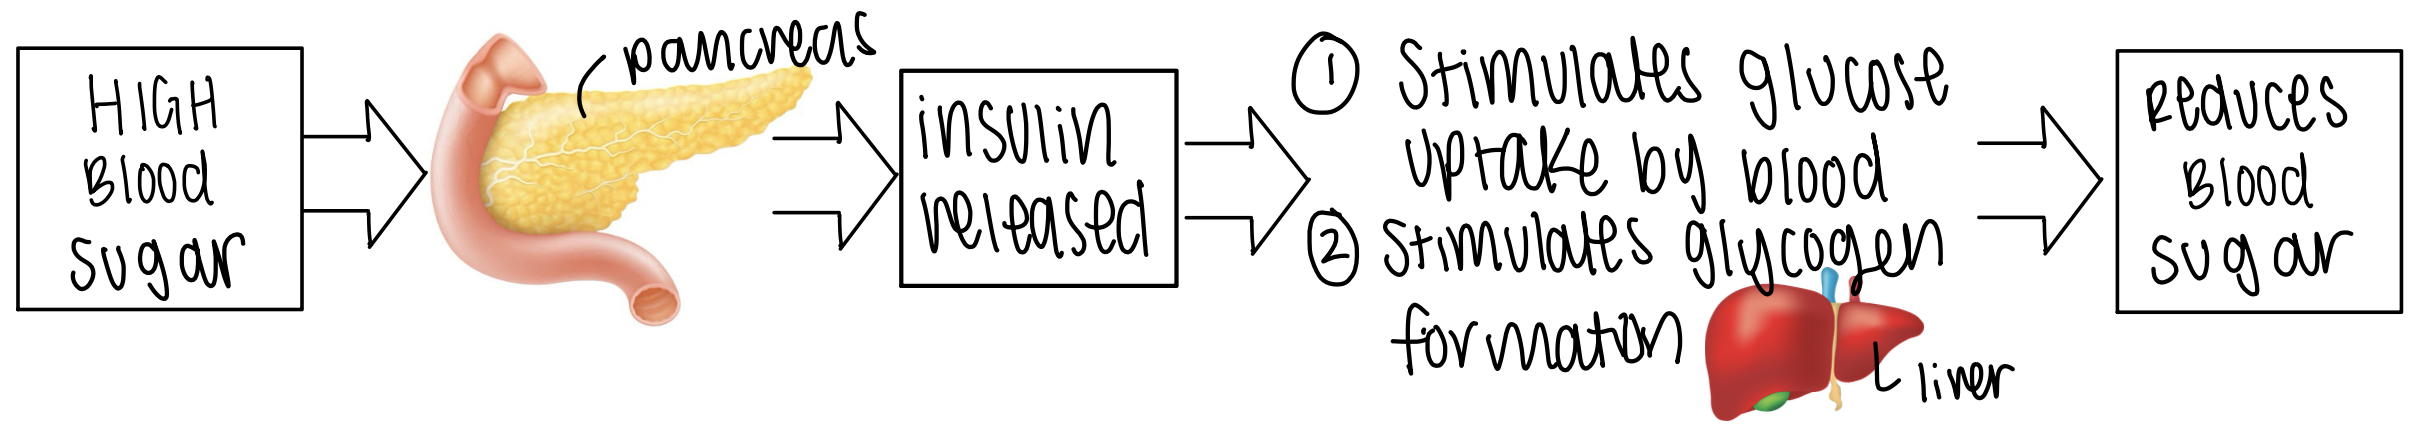

In [41]:
Image(filename='insulin.png')

From these values, we can successfully reject the null hypothesis. When using a confidence level of 99.9%, we have a p-value = $5.1 \times 10^{-10}$ < 0.001, so we can successfully reject the null hypothesis. This makes sense as hormones are produced during pregancy that can make insulin less effective or can reduce an individuals insulin sensitivety. The specific diagnosis of this phenomenon is gestational diabetes. 

Diabetes is directly impacted with changes to insulin sensitivity (how affective it is) because insulin helps to reduce blood sugar levels. If insulin sensitivity decreases, it becomes less affective as the liver doesn't produce as much glycogen (getting rid of sugar from blood to store in this form) and cells to not take up glucose from blood. This results in increased blood sugar levels causing diabetes as the body cannot regulate itself. 

Potential factors to consider include that this data was only taken from a specific Native American tribe, meaning that we can only be confident in this hypothesis with this specific subpopulation. In addition, there could be "biases" of us not knowing specifically what type of diabetes these individuals have. Individuals in this data set could have diabetes and also happen to have children, but the diabetes may not have been caused by the pregnancies. This shows that there are more factors that need to be controlled in order to get an accurate picture of what is going when only looking at this data. 

### Possible Prediction of Diabetes from Number of Pregnancies: 

After getting the p-value above, I was curious if we could predict an individual from this dataset has diabetes from looking at pregnancies alone. In order to look at this, I did a logistical regression plot. 

In [42]:
preg_bias = diabetes2[[s]]
preg_bias["bias"] = 1 # make the bias all the same

# define necessary variables for logistical regressions
def sigma(t):
    return (1/(1+np.e**(-t)))
def predicted_prob(X, theta):
    return sigma(np.sum(X * theta, axis=1))
def mse(y_obs, y_hat):
    return np.mean((y_obs - y_hat)**2)
def mse_for_model(theta):
    y_obs = preg_bias[s]
    y_hat = sigma(theta[0]*y_obs + theta[1])
    return mse(diabetes2["Outcome"], y_hat)

from scipy.optimize import minimize
# find optimal theta values by minimizing mean squared error
optimal_theta = minimize(mse_for_model, x0=[0,0])
theta_hat_1 = optimal_theta["x"][0]
theta_hat_2 = optimal_theta["x"][1]

# predict the values and create dataframe
y_hat = predicted_prob(preg_bias, np.array([theta_hat_1, theta_hat_2])) 
preg_and_prediction = diabetes2.copy()
preg_and_prediction["Predicted"] = np.round(y_hat)
preg_and_prediction.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
0,6,148,72,35,0,33.6,0.627,50,1,0.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,0.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,0.0


Porportion correctly labeled: 0.6640625


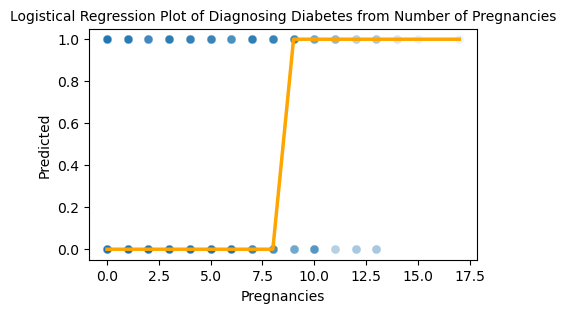

In [43]:
# create graphic 
fig = plt.figure(figsize=(5,3))
sns.lineplot(preg_and_prediction, x=s, y="Predicted", color="orange", linewidth=2.5) # predicted values
sns.scatterplot(preg_and_prediction, x=s, y="Outcome", s=40, alpha=0.09) # values in dataset
plt.title("Logistical Regression Plot of Diagnosing Diabetes from Number of Pregnancies", size=10)

# find the proportion of correctly labeled rows
percentage_correct = preg_and_prediction[preg_and_prediction["Predicted"] == preg_and_prediction["Outcome"]].shape[0]/preg_and_prediction.shape[0]
print(f"Porportion correctly labeled: {percentage_correct}")

From this plot we can see that we are not able to predict whether someone has diabetes from pregnancy values alone. I thought this was important to include because although we found statistical significance, we need to look at the bigger picture. The combination of the factors will allow us to predict whether someone has diabetes. 

Expanding on my explanation above, we don't know what type of diabetes these individuals were diagnosed with. This is why we cannot draw a complete conclusion as to why there are some correlations in the data. Although pregnancies may indicate whether one has diabetes, the patient could have Type 1 Diabetes which is unaffected by pregnancy. This is why I used the other data set for the prediction section in order to make predictions on a type of diagnosis instead of whether a diagnosis is made.

In [44]:
from scipy import stats
p_valuedf = pd.DataFrame({"Variable": diabetes2.columns[:-1], "p-value mannwhitneyu": 0, "p-value t-test": 0})

for i in range(len(diabetes2.columns[:-1])):
    col = diabetes2.columns[:-1][i]
    group0 = diabetes2[diabetes2["Outcome"] == 0][col]
    group1 = diabetes2[diabetes2["Outcome"] == 1][col]

    # calculate p-values, update dataframe
    statman, p_valueman = stats.mannwhitneyu(group0, group1, alternative='two-sided')
    p_valuedf.loc[i, "p-value mannwhitneyu"] = p_valueman

    statttest, p_valuettest = stats.ttest_ind(group0, group1)
    p_valuedf.loc[i, "p-value t-test"] = p_valuettest
p_valuedf.sort_values(by="p-value mannwhitneyu")


,Variable,p-value mannwhitneyu,p-value t-test
1,Glucose,1.200727e-39,8.935432e-43
5,BMI,9.730790e-18,1.229807e-16
7,Age,1.142200e-17,2.209975e-11
0,Pregnancies,3.745146e-08,5.065127e-10
6,DiabetesPedigreeFunction,1.196583e-06,1.254607e-06
2,BloodPressure,7.558512e-05,7.151390e-02
3,SkinThickness,1.296183e-02,3.834770e-02
4,Insulin,6.566037e-02,2.861865e-04


### Conclusion: 
In this section I explored whether the number of pregnancies had statistical significance on whether an individual was diagnosed with diabetes. I found that it was statistically significant, but couldn't accurately predict if someone was diagnosed on its own. In addition, I found that other factors including glucose, BMI, age, and blood pressure were also statistically significant when evaluating with mann whitney u-stat. We can see that seperately, all of the values have significance between individuals with and without diabetes. In order to evaluate these factors more deeply, we need to look at different types of diabetes as they have different paths to causing diabetes resulting in varience in variables (which can be seen through statistical significance of variables). I will explore this in my prediction section.

## Predicting Between Type 1 and Type 2 Diabetes
I couldn't fully connect why I got the results I did, but still wanted to include it as I thought it had interesting results. 

Text(0.5, 1.0, 'Misclassification Rate of Predicting Type 1 vs Type 2 Diabetes Using Random Forest Classifier')

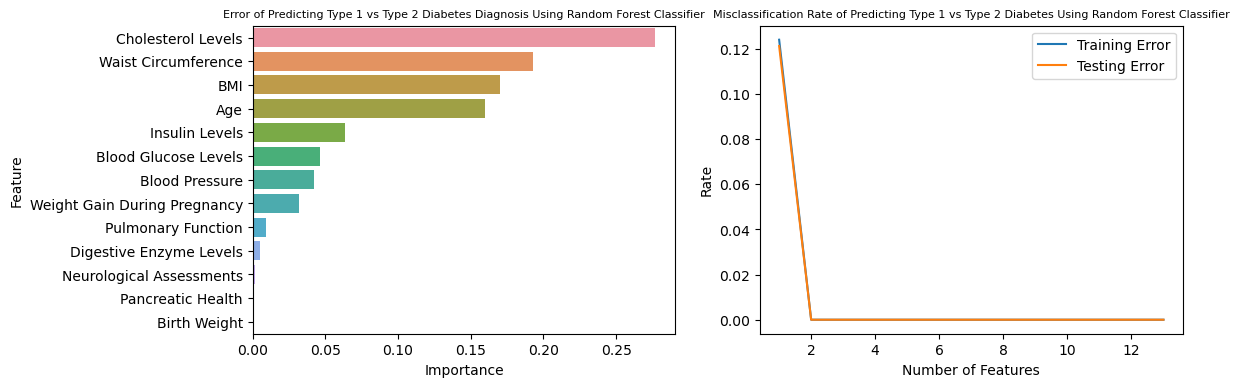

In [45]:
# set up dataframe with numerical values for X and "Target" values as a np.array for y
errors_vs_N = pd.DataFrame(columns = ["N", "Training Error", "Testing Error"]) # create error dataframe
range_of_num_features = [1, 2, 3, 4,5 ,6 ,7 ,8, 9, 10, 11, 13]
numb = type12[numb_cols]
numb["Target"] = type12["Target"]
forest_data = type12.copy()
X = forest_data[numb_cols]
y = forest_data["Target"]

# train the model, fit it over the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
predict = rf_classifier.predict(X_test)

# find the feature importance
importance = rf_classifier.feature_importances_
importancedf = pd.DataFrame({"Feature": X_train.columns, "Importance": importance})

# visual of importance of features
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(importancedf.sort_values(by="Importance", ascending=False), y="Feature", x="Importance", ax=axes[0])
plt.ylabel("Error")
plt.xlabel("Number of Features (ordered by descending significance)")
axes[0].set_title("Error of Predicting Type 1 vs Type 2 Diabetes Diagnosis Using Random Forest Classifier", fontsize=8)

# create model again, but with 1-N features, calculate error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

for N in range_of_num_features:
    rf_classifier = RandomForestClassifier()
    X_train_first_N_features = X_train.iloc[:, :N]
    X_test_first_N_features = X_test.iloc[:, :N]

    # train model, predict values for test and train
    rf_classifier.fit(X_train_first_N_features, y_train)
    predict_test = rf_classifier.predict(X_test_first_N_features)
    predict_train = rf_classifier.predict(X_train_first_N_features)

    # calculate whether the model correctly classified, find proportion incorrect, update dataframe
    accur_test = predict_test != y_test
    accur_train = predict_train != y_train
    accuracy_test = sum(accur_test)/len(accur_test)
    accuracy_train = sum(accur_train)/len(accur_train)
    errors_vs_N.loc[len(errors_vs_N)] = [N, accuracy_train, accuracy_test]

# visual of training and testing error of model
sns.lineplot(errors_vs_N, x="N", y="Training Error", label="Training Error", ax=axes[1])
sns.lineplot(errors_vs_N, x="N", y="Testing Error", label="Testing Error", ax=axes[1])
plt.ylabel("Rate")
plt.xlabel("Number of Features")
plt.title("Misclassification Rate of Predicting Type 1 vs Type 2 Diabetes Using Random Forest Classifier", fontsize=8)

## Conclusion:
The main features when using random forest classification had more variation in importance factors than the previous classificaiton. It frequently fluquated what the most important features were. I found that BMI, cholesertol, and age were mainly weighted as highly important. BMI would make sense as type 2 diabetes can occur from from chronic levels of high blood glucose levels from eating certain foods that alter the bodies ability to use insulin to regulate blood sugar levels. Age also makes sense as patients with type 1 diabetes do not have the ability to produce insulin (therefore is identified at a younger age) where type 2 diabetes can occur from a response to chronic levels of glucose in the blood stream that alter the amount of insulin produced and effectiveness. Cholesterol levels was interesting to look into. I found that increased viseral fat can increase LDL (low-density lipoprotein) which can reduce insulin sensitivity. This differs from type 1 as this process doesn't occur (unless the patients diet consists of food composed of LDLs). 

I also found the testing and training errors to be equal which was interesting. I explored this further and found that the features I was using were completely seperate for type I and type II diabetes. I am not sure if this should be the case and question whether this dataset was generated instead of using actual data. Even with this, I still found the analysis to be insightful as I looked into the reasons why each feature would be present and important for diagnosing diabetes. 